In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
airbnb_data = pd.read_csv('AB_NYC_2019.csv')
airbnb_df = pd.DataFrame(airbnb_data)
airbnb_df.head()
airbnb_df['min_price_to_stay'] = airbnb_df['price'] * airbnb_df['minimum_nights']
airbnb_df = airbnb_df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group','neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'min_price_to_stay',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']]
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,149,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,89,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,140,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,160,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,1150,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,55,0,NaN,NaN,6,2


In [3]:
queens_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens']
queens_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,390,248,2019-07-01,2.25,1,215
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,2100,25,2019-05-31,0.22,1,324
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,280,1,2011-09-19,0.01,1,1
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,2370,28,2019-04-12,0.26,1,126
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,2800,10,2019-05-12,0.11,5,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48858,36458668,"2beds Private Room Step to LGA, CitiFiled, Mid...",217463199,Marvy,Queens,Flushing,40.74387,-73.82556,Private room,68,3,204,0,NaN,NaN,4,362
48863,36469741,Comfortable & Big room with 2 beds!,274012871,Stefan,Queens,Long Island City,40.76726,-73.93936,Private room,93,2,186,0,NaN,NaN,2,14
48866,36472710,CozyHideAway Suite,274225617,Alberth,Queens,Briarwood,40.70786,-73.81448,Entire home/apt,58,1,58,0,NaN,NaN,1,159
48878,36479723,Room for rest,41326856,Jeerathinan,Queens,Elmhurst,40.74477,-73.87727,Private room,45,1,45,0,NaN,NaN,5,172


In [4]:
del queens_df['name'],queens_df['host_name']
queens_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,50124,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,390,248,2019-07-01,2.25,1,215
77,18198,70091,Queens,Woodside,40.75038,-73.90334,Private room,70,30,2100,25,2019-05-31,0.22,1,324
143,32363,140025,Queens,Flushing,40.74028,-73.83168,Private room,140,2,280,1,2011-09-19,0.01,1,1
161,39593,110506,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,2370,28,2019-04-12,0.26,1,126
181,45910,204539,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,2800,10,2019-05-12,0.11,5,365


In [5]:
queens_df.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
min_price_to_stay                   int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
queens_df.isnull().sum()

id                                   0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
min_price_to_stay                    0
number_of_reviews                    0
last_review                       1092
reviews_per_month                 1092
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
queens_df.count()

id                                5666
host_id                           5666
neighbourhood_group               5666
neighbourhood                     5666
latitude                          5666
longitude                         5666
room_type                         5666
price                             5666
minimum_nights                    5666
min_price_to_stay                 5666
number_of_reviews                 5666
last_review                       4574
reviews_per_month                 4574
calculated_host_listings_count    5666
availability_365                  5666
dtype: int64

In [8]:
#replacing all NaN values in 'reviews_per_month' with 0
queens_df.loc[:, 'reviews_per_month'] = queens_df.loc[:, 'reviews_per_month'].fillna(0)
queens_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,50124,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,390,248,2019-07-01,2.25,1,215
77,18198,70091,Queens,Woodside,40.75038,-73.90334,Private room,70,30,2100,25,2019-05-31,0.22,1,324
143,32363,140025,Queens,Flushing,40.74028,-73.83168,Private room,140,2,280,1,2011-09-19,0.01,1,1
161,39593,110506,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,2370,28,2019-04-12,0.26,1,126
181,45910,204539,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,2800,10,2019-05-12,0.11,5,365


In [9]:
queens_df['last_review'] = queens_df['last_review'].replace(np.nan, '9999-12-31')
queens_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,50124,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,390,248,2019-07-01,2.25,1,215
77,18198,70091,Queens,Woodside,40.75038,-73.90334,Private room,70,30,2100,25,2019-05-31,0.22,1,324
143,32363,140025,Queens,Flushing,40.74028,-73.83168,Private room,140,2,280,1,2011-09-19,0.01,1,1
161,39593,110506,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,2370,28,2019-04-12,0.26,1,126
181,45910,204539,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,2800,10,2019-05-12,0.11,5,365


In [10]:
queens_df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
min_price_to_stay                 0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
pd.options.display.float_format = "{:.2f}".format
queens_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00
mean,21754997.22,96156799.53,40.73,-73.87,99.52,5.18,893.32,27.70,1.57,4.06,144.45
std,10376865.56,84243236.25,0.04,0.06,167.10,15.03,20077.27,51.96,2.13,12.45,135.54
min,12937.00,3211.00,40.57,-73.96,10.00,1.00,10.00,0.00,0.00,1.00,0.00
25%,13960418.25,21216008.00,40.71,-73.92,50.00,1.00,80.00,1.00,0.08,1.00,2.00
50%,22564596.00,68271464.00,40.74,-73.90,75.00,2.00,160.00,7.00,0.76,1.00,98.00
75%,30768797.25,158031226.25,40.76,-73.83,110.00,3.00,375.00,32.00,2.31,3.00,286.00
max,36484363.00,274225617.00,40.80,-73.71,10000.00,500.00,1000000.00,629.00,20.94,103.00,365.00


In [12]:
len(queens_df)

5666

In [13]:
min_nights_queens_quartiles = queens_df['minimum_nights'].quantile([.25,.5,.75])
min_nights_lowerq = min_nights_queens_quartiles[.25]
min_nights_upperq = min_nights_queens_quartiles[.75]
min_nights_iqr = (min_nights_upperq-min_nights_lowerq).round(2)
min_nights_low_b = (min_nights_lowerq - (1.5*min_nights_iqr)).round(2)
print(f'lower bound for minimum nights is {min_nights_low_b}')
min_nights_up_b = (min_nights_upperq + (1.5*min_nights_iqr)).round(2)
print(f'upper bound for minimum nights is {min_nights_up_b}')

price_queens_quartiles = queens_df['price'].quantile([.25,.5,.75])
price_lowerq = price_queens_quartiles[.25]
price_upperq = price_queens_quartiles[.75]
price_iqr = (price_upperq-price_lowerq).round(2)
price_low_b = (price_lowerq - (1.5*price_iqr)).round(2)
print(f'lower bound for price is {price_low_b}')
price_up_b = (price_upperq + (1.5*price_iqr)).round(2)
print(f'upper bound for price is {price_up_b}')

lower bound for minimum nights is -2.0
upper bound for minimum nights is 6.0
lower bound for price is -40.0
upper bound for price is 200.0


In [14]:
queens_cleaned_df = queens_df.loc[(queens_df['price'] <= 200) & (queens_df['minimum_nights'] < 6) & (queens_df['number_of_reviews'] > 0)]
queens_cleaned_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,50124,Queens,Long Island City,40.75,-73.95,Private room,130,3,390,248,2019-07-01,2.25,1,215
143,32363,140025,Queens,Flushing,40.74,-73.83,Private room,140,2,280,1,2011-09-19,0.01,1,1
196,51850,27848,Queens,Jamaica,40.67,-73.77,Private room,55,2,110,52,2019-05-20,0.49,2,365
218,57166,272006,Queens,Ditmars Steinway,40.77,-73.91,Entire home/apt,140,2,280,17,2019-06-17,0.16,1,292
257,63360,307962,Queens,Astoria,40.75,-73.91,Entire home/apt,99,5,495,441,2019-06-24,4.50,1,226


In [15]:
# going from 5666 listings to 3813 after removing outliers and only looking at those with reviews
len(queens_cleaned_df)

3813

In [32]:
price_bins = [0,49.9,99.9,149.9,249.9,399.9,10001]
bin_names = ['0-49','50-99','100-149','150-249','250-399','>400']
queens_df['price range'] = pd.cut(queens_df['price'],price_bins,labels=bin_names)
neighbourhood_by_count = queens_df[['neighbourhood', 'room_type', 'price range','number_of_reviews','minimum_nights','min_price_to_stay']].groupby(['neighbourhood', 'room_type', 'price range']).agg(['count', 'mean', 'min', 'max'])
neighbourhood_by_count = neighbourhood_by_count.sort_values(by=('number_of_reviews', 'count'), ascending=False)
neighbourhood_by_count.head(25)

number_of_reviews              \
                                                         count   mean  min   
neighbourhood    room_type       price range                                 
Astoria          Private room    50-99                     321  22.36 0.00   
Flushing         Private room    50-99                     199  36.15 0.00   
Long Island City Private room    50-99                     196  30.16 0.00   
Astoria          Entire home/apt 100-149                   150  24.07 0.00   
Ridgewood        Private room    50-99                     137  22.65 0.00   
Sunnyside        Private room    50-99                     135  29.84 0.00   
Ridgewood        Private room    0-49                      130   8.12 0.00   
Ditmars Steinway Private room    50-99                     122  24.51 0.00   
Astoria          Entire home/apt 50-99                     108  26.25 0.00   
                 Private room    0-49                      100  21.35 0.00   
                 Entire home/apt 150-249                    93  15.80 0.00   
Long Island City Entire home/apt 150-249                    90  16.83 0.00   
Flushing         Private room    0-49                       89  37.66 0.00   
Jamaica          Private room    50-99                      87  39.25 0.00   
Woodside         Private room    50-99                      84  24.02 0.00   
Long Island City Entire home/apt 100-149                    79  17.61 0.00   
Elmhurst         Private room    50-99                      77  24.34 0.00   
                                 0-49                       77  17.31 0.00   
Woodside         Private room    0-49                       73   4.30 0.00   
Jackson Heights  Private room    50-99                      65  32.17 0.00   
East Elmhurst    Private room    50-99                      64  88.78 0.00   
Astoria          Private room    100-149                    56  16.80 0.00   
East Elmhurst    Private room    0-49                       55 117.69 0.00   
Sunnyside        Private room    0-49                       55  13.44 0.00   
                 Entire home/apt 100-149                    54  26.67 0.00   

                                                    minimum_nights             \
                                                max          count  mean  min   
neighbourhood    room_type       price range                                    
Astoria          Private room    50-99       274.00            321  4.45 1.00   
Flushing         Private room    50-99       474.00            199  1.96 1.00   
Long Island City Private room    50-99       244.00            196  4.51 1.00   
Astoria          Entire home/apt 100-149     414.00            150  5.87 1.00   
Ridgewood        Private room    50-99       275.00            137  3.22 1.00   
Sunnyside        Private room    50-99       258.00            135  4.97 1.00   
Ridgewood        Private room    0-49         77.00            130 13.01 1.00   
Ditmars Steinway Private room    50-99       207.00            122  3.33 1.00   
Astoria          Entire home/apt 50-99       441.00            108  7.44 1.00   
                 Private room    0-49        191.00            100 10.63 1.00   
                 Entire home/apt 150-249     149.00             93  3.28 1.00   
Long Island City Entire home/apt 150-249     121.00             90  8.71 1.00   
Flushing         Private room    0-49        186.00             89  3.09 1.00   
Jamaica          Private room    50-99       392.00             87  1.82 1.00   
Woodside         Private room    50-99       270.00             84  8.23 1.00   
Long Island City Entire home/apt 100-149     227.00             79 13.24 1.00   
Elmhurst         Private room    50-99       188.00             77  2.90 1.00   
                                 0-49        125.00             77 13.51 1.00   
Woodside         Private room    0-49         53.00             73 20.32 1.00   
Jackson Heights  Private room    50-99       204.00             65  4.28 1.00 

In [33]:
q_nhood_by_popularity = []

for row in neighbourhood_by_count.head(25).index:
    if row[0] not in q_nhood_by_popularity:
        q_nhood_by_popularity.append(row[0])

q_nhood_listing_count = []


for n in q_nhood_by_popularity:
    count = len(queens_df.loc[queens_df['neighbourhood'] == n])
    q_nhood_listing_count.append(count)

listing_count_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': q_nhood_by_popularity,
    'count': q_nhood_listing_count
})

listing_count_by_neighbourhood_df = listing_count_by_neighbourhood_df.sort_values(by='count', ascending=False)
listing_count_by_neighbourhood_df


,neighbourhood,count
0,Astoria,900
2,Long Island City,537
1,Flushing,426
3,Ridgewood,423
4,Sunnyside,363
5,Ditmars Steinway,309
8,Elmhurst,237
7,Woodside,235
6,Jamaica,231
9,Jackson Heights,186


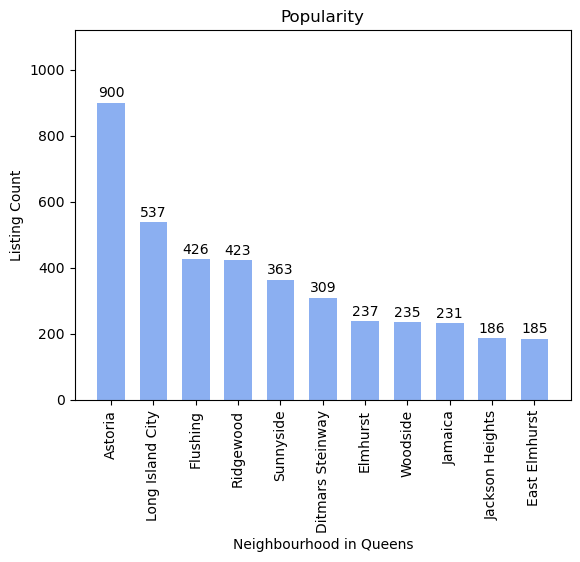

In [34]:
fig, ax = plt.subplots()

x_axis = np.arange(len(q_nhood_by_popularity))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, listing_count_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = listing_count_by_neighbourhood_df['count']


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Listing Count')
ax.set_title('Popularity')
ax.set_xlabel('Neighbourhood in Queens')
ax.set_ylim(0,max(q_nhood_listing_count)+220)


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

In [35]:
neighbourhood_by_price = neighbourhood_by_count.head(25)

neighbourhood_by_price.loc[:, 'worth_per_stay'] = neighbourhood_by_price.loc[:, ('min_price_to_stay', 'mean')] 

neighbourhood_by_price.loc[:, 'Room Type'] = ''

for i in range(len(neighbourhood_by_price)):
    neighbourhood_by_price.iloc[i, 13] = neighbourhood_by_price.index[i][1]

    
for i in range(len(neighbourhood_by_price)):
    if neighbourhood_by_price.iloc[i, 13] == 'Private room':
        neighbourhood_by_price.iloc[i, 12] = neighbourhood_by_price.iloc[i, 9]  * 2
        
neighbourhood_by_price = neighbourhood_by_price.sort_values(by='worth_per_stay', ascending=False)

del neighbourhood_by_price['Room Type']

neighbourhood_by_price.head()

number_of_reviews             \
                                                         count  mean  min   
neighbourhood    room_type       price range                                
Long Island City Entire home/apt 100-149                    79 17.61 0.00   
                                 150-249                    90 16.83 0.00   
Woodside         Private room    0-49                       73  4.30 0.00   
Sunnyside        Private room    0-49                       55 13.44 0.00   
Ridgewood        Private room    0-49                      130  8.12 0.00   

                                                    minimum_nights             \
                                                max          count  mean  min   
neighbourhood    room_type       price range                                    
Long Island City Entire home/apt 100-149     227.00             79 13.24 1.00   
                                 150-249     121.00             90  8.71 1.00   
Woodside         Private room    0-49         53.00             73 20.32 1.00   
Sunnyside        Private room    0-49        134.00             55 15.98 1.00   
Ridgewood        Private room    0-49         77.00            130 13.01 1.00   

                                                    min_price_to_stay          \
                                                max             count    mean   
neighbourhood    room_type       price range                                    
Long Island City Entire home/apt 100-149     500.00                79 1684.03   
                                 150-249     480.00                90 1654.53   
Woodside         Private room    0-49         37.00                73  786.97   
Sunnyside        Private room    0-49         44.00                55  616.87   
Ridgewood        Private room    0-49         45.00               130  522.15   

                                                             worth_per_stay  
                                                min      max                 
neighbourhood    room_type       price range                                 
Long Island City Entire home/apt 100-149     100.00 67000.00        1684.03  
                                 150-249     150.00 95520.00        1654.53  
Woodside         Private room    0-49         31.00  1470.00        1573.95  
Sunnyside        Private room    0-49         33.00  1680.00        1233.75  
Ridgewood        Private room    0-49         23.00  2115.00        1044.31

In [36]:
q_nhood_by_worth = []

for row in neighbourhood_by_count.head(25).index:
    if row[0] not in q_nhood_by_worth:
        q_nhood_by_worth.append(row[0])
        
    neighbourhood_by_price.loc[:, 'location'] = ''
for i in range(len(neighbourhood_by_price)):
    neighbourhood_by_price.iloc[i, 13] = neighbourhood_by_price.index[i][0]
    
    q_nhood_worth_per_stay = []
    
for n in q_nhood_by_worth:
    price = sum(neighbourhood_by_price.loc[neighbourhood_by_price['location'] == n, 'worth_per_stay'])
    q_nhood_worth_per_stay.append(price)
    
worth_per_stay_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': q_nhood_by_worth,
    'Worth per Stay': q_nhood_worth_per_stay
})
worth_per_stay_by_neighbourhood_df = worth_per_stay_by_neighbourhood_df.sort_values(by='Worth per Stay', ascending=False)
worth_per_stay_by_neighbourhood_df

,neighbourhood,Worth per Stay
0,Astoria,4116.67
2,Long Island City,3931.77
7,Woodside,2561.33
4,Sunnyside,2433.23
3,Ridgewood,1437.68
8,Elmhurst,1306.81
9,Jackson Heights,549.97
1,Flushing,507.22
5,Ditmars Steinway,426.25
10,East Elmhurst,310.23


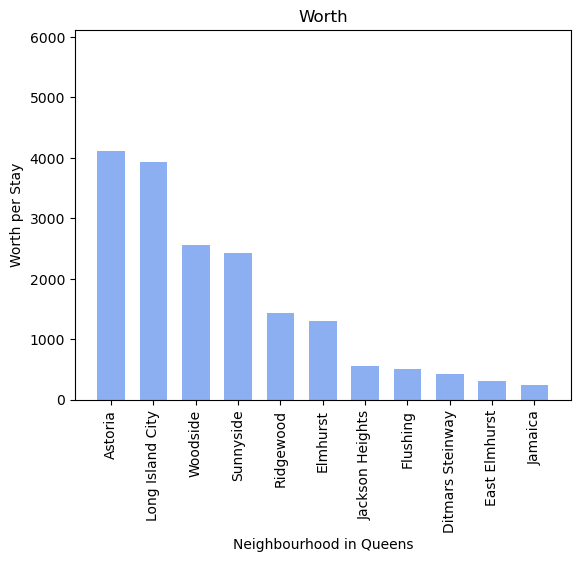

In [37]:
fig, ax = plt.subplots()

x_axis = np.arange(len(q_nhood_by_worth))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, worth_per_stay_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = round(worth_per_stay_by_neighbourhood_df['Worth per Stay'], 2)


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Worth per Stay')
ax.set_title('Worth')
ax.set_xlabel('Neighbourhood in Queens')
ax.set_ylim(0,max(q_nhood_worth_per_stay)+2000)
plt.show()

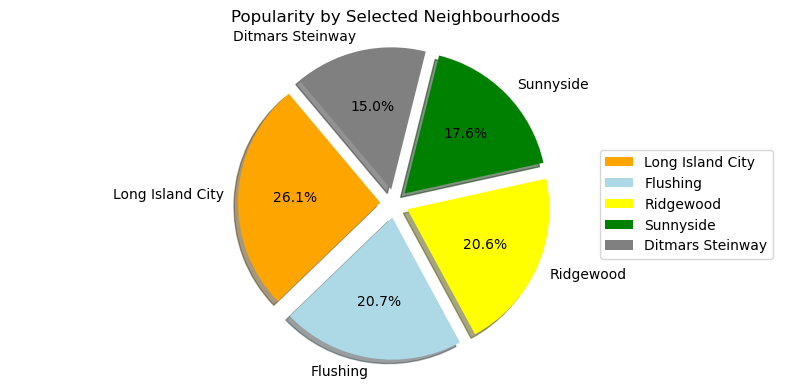

In [38]:
pie_chart_df = listing_count_by_neighbourhood_df.reset_index(drop=True)

pie_chart_df = pie_chart_df.loc[1:5, :]

fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

neigh_list = pie_chart_df['neighbourhood']
length = len(pie_chart_df['neighbourhood'])

x_axis = np.arange(length)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, neigh_list, rotation=90)

y_axis = pie_chart_df['count']

explode = (0.1,0.1,0.1,0.1,0.1)
colors = ["orange","lightblue", "yellow", "green", "grey"]

ax.pie(y_axis, explode=explode, labels=neigh_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

ax.set_title("Popularity by Selected Neighbourhoods")
ax.legend(loc="center right")

plt.axis("equal")

fig.tight_layout()
plt.show()

In [39]:
profitability_df = worth_per_stay_by_neighbourhood_df.reset_index(drop=True)

profitability_df = profitability_df.iloc[0:5, :]

profitability_df.loc[:, 'Profitability'] = ''

profitability_df.iloc[0, 2] = profitability_df.iloc[0, 1] * (pie_chart_df.iloc[0, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[1, 2] = profitability_df.iloc[1, 1] * (pie_chart_df.iloc[1, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[2, 2] = profitability_df.iloc[2, 1] * (pie_chart_df.iloc[2, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[3, 2] = profitability_df.iloc[3, 1] * (pie_chart_df.iloc[3, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[4, 2] = profitability_df.iloc[4, 1] * (pie_chart_df.iloc[4, 1] / sum(pie_chart_df['count'])) 

profitability_df = profitability_df.loc[:, ['neighbourhood', 'Profitability']]

profitability_df

,neighbourhood,Profitability
0,Astoria,1074.18
1,Long Island City,813.87
2,Woodside,526.45
3,Sunnyside,429.19
4,Ridgewood,215.86


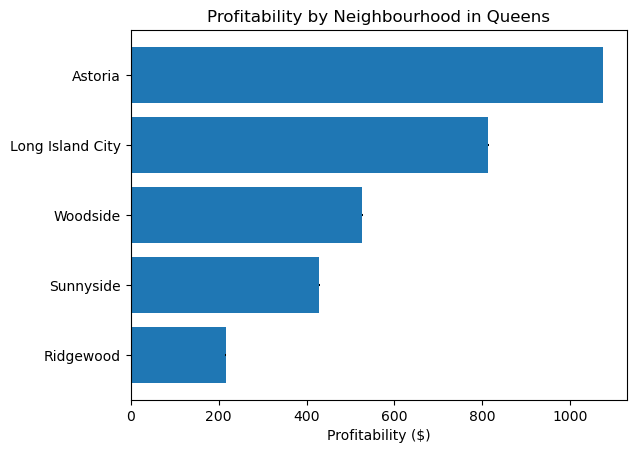

In [40]:
y_axis = profitability_df['neighbourhood'].values
x_axis = profitability_df['Profitability'].values

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(y_axis))
error = np.random.rand(len(y_axis))
ax.barh(y_pos, x_axis, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Profitability ($)')
ax.set_title('Profitability by Neighbourhood in Queens')
plt.show()

In [41]:
bronx_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Bronx']

manhattan_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan']

queens_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens']

brooklyn_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Brooklyn']

staten_island_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Staten Island']


In [42]:
bronx_sample_crime_df = bronx_crime_df.sample(n=100, replace=True, random_state=1)
manhattan_sample_crime_df = manhattan_crime_df.sample(n=100, replace=True, random_state=1)
queens_sample_crime_df = queens_crime_df.sample(n=100, replace=True, random_state=1)
brooklyn_sample_crime_df = brooklyn_crime_df.sample(n=100, replace=True, random_state=1)
staten_island_sample_crime_df = staten_island_crime_df.sample(n=100, replace=True, random_state=1)


bronx_sample_crime_df = bronx_sample_crime_df.reset_index(drop=True)
manhattan_sample_crime_df = manhattan_sample_crime_df.reset_index(drop=True)
queens_sample_crime_df = queens_sample_crime_df.reset_index(drop=True)
brooklyn_sample_crime_df = brooklyn_sample_crime_df.reset_index(drop=True)
staten_island_sample_crime_df = staten_island_sample_crime_df.reset_index(drop=True)

In [43]:
crime_df_sample_list = [bronx_sample_crime_df, manhattan_sample_crime_df, queens_sample_crime_df, brooklyn_sample_crime_df, staten_island_sample_crime_df]

neighbourhoods = ['Bronx', 'Manhattan', 'Queens', 'Brooklyn', 'Staten Island']
crime_numbers = []

for sample in crime_df_sample_list:
    for index, row in sample.iterrows():
        neighbourhood = row["neighbourhood"]
        neighbourhood_group = row["neighbourhood_group"]
        print(f'Looking for crime rate in index no:{index} | {neighbourhood} | {neighbourhood_group}')
        lat = row["latitude"]
        lng = row["longitude"]
        url = 'https://data.cityofnewyork.us/resource/qb7u-rbmr.json?$where=within_circle'
        query_url = url + f"(lat_lon, {lat}, {lng}, 2000)"
    
        response = requests.get(query_url)
        data = response.json()
    
        try:
            sample.loc[index,'Number of Crimes'] = len(data)

        except:
            print(f"missing value for row number {index}")
    print(f"Total Number of Crimes in {neighbourhood_group}: {sum(sample['Number of Crimes'])}")
    crime_numbers.append(sum(sample['Number of Crimes']))
    
print(f"------------------------------------------------------------------------")
print(f"Data retrieval complete.")

Looking for crime rate in index no:0 | Pelham Gardens | Bronx
Looking for crime rate in index no:1 | Longwood | Bronx
Looking for crime rate in index no:2 | Williamsbridge | Bronx
Looking for crime rate in index no:3 | Kingsbridge | Bronx
Looking for crime rate in index no:4 | Mott Haven | Bronx
Looking for crime rate in index no:5 | Throgs Neck | Bronx
Looking for crime rate in index no:6 | Norwood | Bronx
Looking for crime rate in index no:7 | Port Morris | Bronx
Looking for crime rate in index no:8 | Pelham Bay | Bronx
Looking for crime rate in index no:9 | Longwood | Bronx
Looking for crime rate in index no:10 | Allerton | Bronx
Looking for crime rate in index no:11 | Woodlawn | Bronx
Looking for crime rate in index no:12 | Morrisania | Bronx
Looking for crime rate in index no:13 | Soundview | Bronx
Looking for crime rate in index no:14 | North Riverdale | Bronx
Looking for crime rate in index no:15 | Mott Haven | Bronx
Looking for crime rate in index no:16 | Parkchester | Bronx
Lo

Looking for crime rate in index no:35 | Upper West Side | Manhattan
Looking for crime rate in index no:36 | East Harlem | Manhattan
Looking for crime rate in index no:37 | East Village | Manhattan
Looking for crime rate in index no:38 | Gramercy | Manhattan
Looking for crime rate in index no:39 | East Village | Manhattan
Looking for crime rate in index no:40 | Lower East Side | Manhattan
Looking for crime rate in index no:41 | Upper West Side | Manhattan
Looking for crime rate in index no:42 | Kips Bay | Manhattan
Looking for crime rate in index no:43 | Washington Heights | Manhattan
Looking for crime rate in index no:44 | East Harlem | Manhattan
Looking for crime rate in index no:45 | Washington Heights | Manhattan
Looking for crime rate in index no:46 | Upper West Side | Manhattan
Looking for crime rate in index no:47 | Little Italy | Manhattan
Looking for crime rate in index no:48 | West Village | Manhattan
Looking for crime rate in index no:49 | Chinatown | Manhattan
Looking for cr

Looking for crime rate in index no:65 | Rego Park | Queens
Looking for crime rate in index no:66 | Ridgewood | Queens
Looking for crime rate in index no:67 | Flushing | Queens
Looking for crime rate in index no:68 | Queens Village | Queens
Looking for crime rate in index no:69 | Kew Gardens | Queens
Looking for crime rate in index no:70 | Jackson Heights | Queens
Looking for crime rate in index no:71 | Woodside | Queens
Looking for crime rate in index no:72 | Jamaica | Queens
Looking for crime rate in index no:73 | Queens Village | Queens
Looking for crime rate in index no:74 | St. Albans | Queens
Looking for crime rate in index no:75 | East Elmhurst | Queens
Looking for crime rate in index no:76 | Woodside | Queens
Looking for crime rate in index no:77 | Rego Park | Queens
Looking for crime rate in index no:78 | Long Island City | Queens
Looking for crime rate in index no:79 | Long Island City | Queens
Looking for crime rate in index no:80 | Astoria | Queens
Looking for crime rate in 

Looking for crime rate in index no:94 | Gowanus | Brooklyn
Looking for crime rate in index no:95 | Clinton Hill | Brooklyn
Looking for crime rate in index no:96 | Williamsburg | Brooklyn
Looking for crime rate in index no:97 | Williamsburg | Brooklyn
Looking for crime rate in index no:98 | Gowanus | Brooklyn
Looking for crime rate in index no:99 | Bushwick | Brooklyn
Total Number of Crimes in Brooklyn: 2.0
Looking for crime rate in index no:0 | St. George | Staten Island
Looking for crime rate in index no:1 | Randall Manor | Staten Island
Looking for crime rate in index no:2 | Richmondtown | Staten Island
Looking for crime rate in index no:3 | Clifton | Staten Island
Looking for crime rate in index no:4 | Arrochar | Staten Island
Looking for crime rate in index no:5 | Stapleton | Staten Island
Looking for crime rate in index no:6 | South Beach | Staten Island
Looking for crime rate in index no:7 | Stapleton | Staten Island
Looking for crime rate in index no:8 | Stapleton | Staten Islan

In [28]:
crime_df = pd.DataFrame({'Neighbourhood': neighbourhoods,
                         'Total Crime Number': crime_numbers
                        })

crime_df = crime_df.sort_values(by='Total Crime Number', ascending=False)
crime_df

,Neighbourhood,Total Crime Number
1,Manhattan,342.00
0,Bronx,12.00
2,Queens,7.00
3,Brooklyn,2.00
4,Staten Island,0.00
